Objetivo: Criar um modelo para classificar os emails em spam ou não utilizando o algoritmo de Machine Learning Support Vector Machine

In [1]:
import pandas as pd # importa a biblioteca pandas

In [2]:
df = pd.read_csv('dadosspam.csv') # importa base de dados

In [4]:
df.head() # exibe as 4 primeiras linhas do dataframe

,frequencia_palavras,presenca_links,num_anexos,comprimento_email,spam
0,6,0,1,793,0
1,3,0,1,698,0
2,7,1,1,455,1
3,4,1,1,810,0
4,6,0,3,620,1


Separando os dados do dataset

In [5]:
X = df.drop('spam',axis=1) # exclui a coluna spam
y = df['spam'] # armazena os dados da coluna spam

In [ ]:
X

In [ ]:
y

Dividindo a base de dados em treino e teste

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3,
                                                random_state=42)

importa a biblioteca SVM para o modelo support vector machine

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [13]:
model = SVC(kernel='linear') # cria modelo de support vector machine

Treinamento do modelo

In [15]:
model.fit(x_train,y_train) # treina o modelo de SVM

SVC(kernel='linear')

Realizando predições

In [17]:
y_prev = model.predict(x_test) #realiza predições

In [ ]:
y_prev # exibe as previsões

In [ ]:
x_test #exibe os dados de teste

Avaliando o modelo

In [30]:
accuracy = accuracy_score(y_test, y_prev)
conf_matrix = confusion_matrix(y_test, y_prev)
prec = precision_score(y_test,y_prev)
f1 = f1_score(y_test,y_prev)
print(f'Precisão {prec:.2f}')
print(f'Acurácia: {accuracy:.2f}')
print(f'F1_score: {f1:.2f}')
print(conf_matrix)

Precisão 1.00
Acurácia: 0.99
F1_score: 0.99
[[149   0]
 [  4 147]]


Visualização dos dados

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

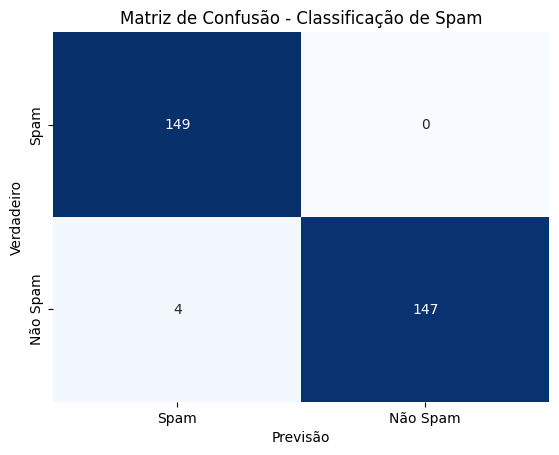

In [34]:
# cria matriz de confusão de forma visual xticks e yticks são os rótulos da matriz
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Spam', 'Não Spam'], yticklabels=['Spam', 'Não Spam']) 
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de Spam')
plt.show()

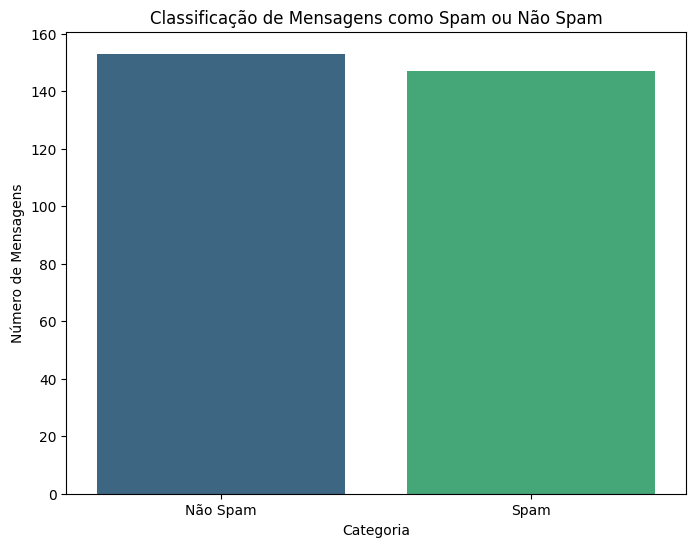

147
153


In [37]:
# Contagem de predições
spam_count = sum(y_prev)
non_spam_count = len(y_prev) - spam_count

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Não Spam', 'Spam'], y=[non_spam_count, spam_count], palette='viridis') # palete cor do heat map
plt.xlabel('Categoria')
plt.ylabel('Número de Mensagens')
plt.title('Classificação de Mensagens como Spam ou Não Spam')
plt.show()
print(spam_count)
print(non_spam_count)
